<a href="https://colab.research.google.com/github/KoMurase/network/blob/master/%E3%83%AA%E3%83%B3%E3%82%AF%E4%BA%88%E6%B8%AC_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#newtwork embedding を使ったリンク予測


In [30]:
import networkx as nx 
import matplotlib.pyplot as plt
import random 
from gensim.models import Word2Vec

In [31]:
#ランダムウォークの長さ分，各頂点のベクトル表現を得る
def make_random_walks(G, num_of_walk, length_of_walk):
  walks = []

  for i in range(num_of_walk):
    node_list = list(G.nodes())

    for node in node_list:
      current_node = node 
      walk = []
      walk.append(str(node))

      for j in range(length_of_walk):
        next_node = random.choice(list(G.neighbors(current_node)))
        walk.append(str(next_node))
        current_node = node 
      walks.append(walk)

  return walks 

In [45]:
G = nx.karate_club_graph() 
walks = make_random_walks(G, 100, 20 )

In [46]:
model = Word2Vec(walks, min_count=0,size=2, window=5,  workers=1)

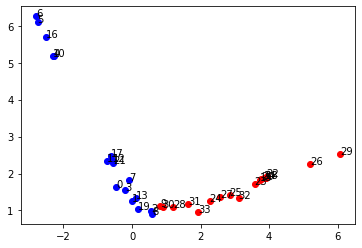

In [47]:
x = list()
y = list() 
node_list = list()
colors = list() 
fig, ax = plt.subplots() 
for node in G.nodes():
  vector = model.wv[str(node)]
  x.append(vector[0])
  y.append(vector[1])
  ax.annotate(str(node), (vector[0], vector[1]))
  if G.nodes[node]["club"] == 'Officer':
    colors.append("r")
  else:
    colors.append("b")
for i in range(len(x)):
  ax.scatter(x[i], y[i], c=colors[i])
plt.show()